In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torchio as tio
from collections import Counter
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import cv2
from PIL import Image

In [6]:
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\nuevas2"
allfiles = os.listdir(fp2)

In [9]:
slices = []
for file in allfiles:

    img = nib.load(os.path.join(fp2,file))
    test = img.get_fdata()
    slices.append(np.size(test,2))
print(slices)

[47, 39, 20, 15, 20, 20, 29, 23, 23, 23, 23, 23, 45, 23, 23, 23, 28, 23, 26, 28, 46, 32, 30, 32, 32, 32, 36, 32, 54, 32, 32, 32, 38, 32, 32, 32, 32, 32, 32, 42, 23, 32, 32, 32, 32, 32, 32, 35, 34, 34, 46, 32, 32, 32, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 64, 64, 64, 64, 64, 39, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 34, 64, 64, 64, 64, 15, 20, 24, 20, 20, 20, 40, 20, 15, 17, 20, 20, 20, 15, 20, 20, 20, 47, 20, 20, 18, 20, 20, 20, 20, 20, 19, 20, 47, 39, 20, 15, 20, 20, 29, 23, 23, 23, 23, 23, 45, 23, 23, 23, 28, 23, 26, 28, 46, 32, 30, 32, 32, 32, 36, 32, 54, 32, 32, 32, 38, 32, 32, 32, 32, 32, 32, 42, 23, 32, 32, 32, 32, 32, 32, 35, 34, 34, 46, 32, 32, 32, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 64, 64, 64, 64, 64, 39, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 34, 64, 64, 64, 64, 15, 20, 24, 20, 20, 20, 40, 20, 15, 17, 20, 20, 20, 15, 20, 20, 20, 47, 20, 20, 18, 20, 20, 20, 20, 20, 19, 20]


In [46]:

c = Counter(slices)
print(c)

Counter({32: 46, 20: 44, 64: 38, 24: 26, 23: 20, 15: 8, 34: 6, 47: 4, 39: 4, 28: 4, 46: 4, 42: 4, 29: 2, 45: 2, 26: 2, 30: 2, 36: 2, 54: 2, 38: 2, 35: 2, 40: 2, 17: 2, 18: 2, 19: 2})


(array([14., 90.,  8., 54., 10.,  6., 10.,  2.,  0., 38.]),
 array([15. , 19.9, 24.8, 29.7, 34.6, 39.5, 44.4, 49.3, 54.2, 59.1, 64. ]),
 <BarContainer object of 10 artists>)

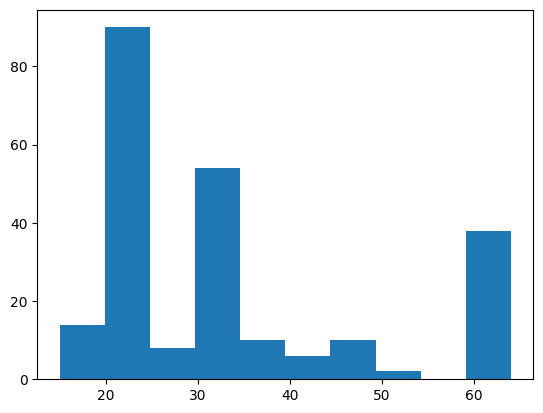

In [47]:
plt.hist(slices,bins=10)

116 pacientes (sujeto_x, segmentacion_x)
Imágenes de 384x384 rotadas 90° sentido anti-horario #corregido con otro script

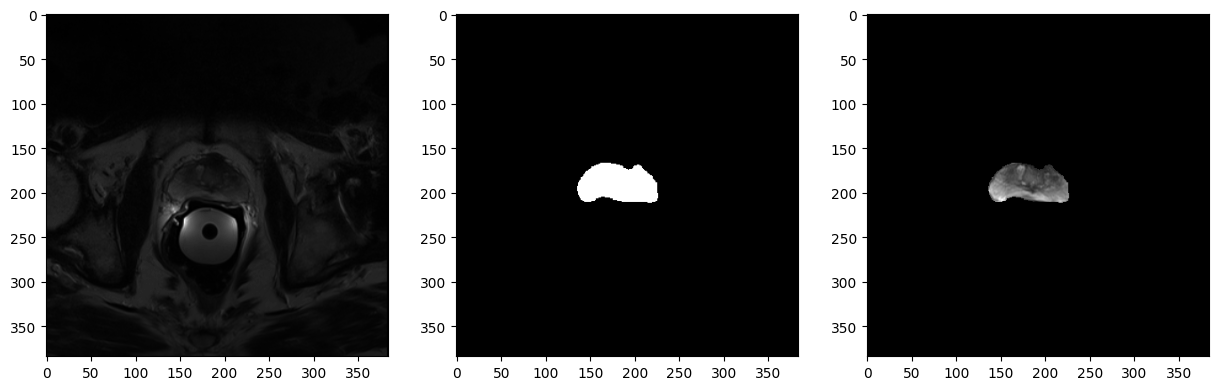

In [7]:
num_sujeto = 50 #1-116
x = nib.load(os.path.join(fp2,"sujeto_"+str(num_sujeto).zfill(3)+".nii"))
sujeto = x.get_fdata()
y = nib.load(os.path.join(fp2,"segmentacion_"+str(num_sujeto).zfill(3)+".nii"))
seg = y.get_fdata()
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[1].imshow(seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[2].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)]*seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
plt.show()

In [8]:
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\flipped"
allfiles = os.listdir(fp2)

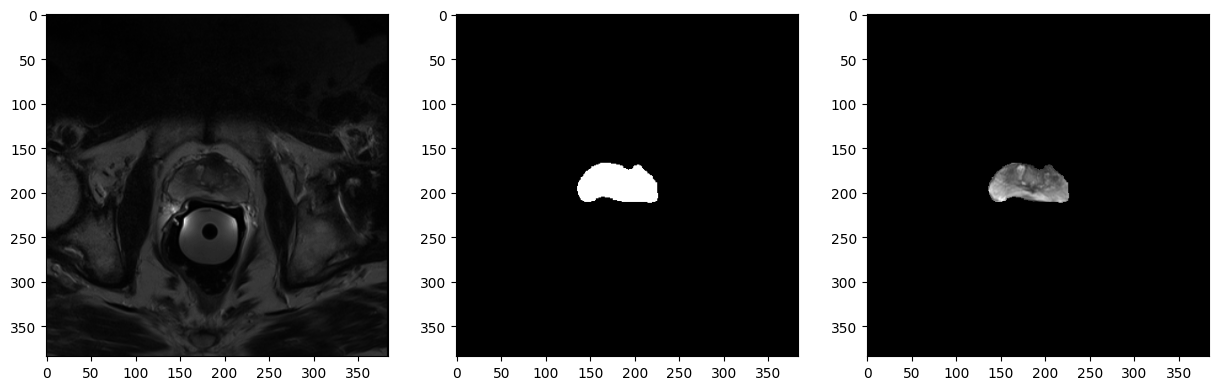

In [9]:
num_sujeto = 50 #1-116
x = nib.load(os.path.join(fp2,"sujeto_"+str(num_sujeto).zfill(3)+".nii"))
sujeto = x.get_fdata()
y = nib.load(os.path.join(fp2,"segmentacion_"+str(num_sujeto).zfill(3)+".nii"))
seg = y.get_fdata()
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[1].imshow(seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[2].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)]*seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
plt.show()

In [5]:
print(x.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 384 384  23   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.4166667 0.4166667 4.0000005 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.012663978
quatern_c       : -0.012635902
quatern_d       : -0.9985955
qoffset_x       : 92.71772
qoffset_y       : 

In [ ]:
num_sujeto = 67 #1-116
x = nib.load(os.path.join(fp2,"sujeto_"+str(num_sujeto)+".nii"))
sujeto = x.get_fdata()
y = nib.load(os.path.join(fp2,"segmentacion_"+str(num_sujeto)+".nii"))
seg = y.get_fdata()

for i in range(np.size(sujeto,2)):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(sujeto[:,:,i],cmap="gray")
    ax[1].imshow(seg[:,:,i],cmap="gray")
    #plt.clf()
    #plt.pause(0.05)
    plt.show()

In [80]:
sizeSujeto = []
sizeSeg = []
for file in allfiles:
    x = nib.load(os.path.join(fp2,file))
    y = x.get_fdata()
    if "sujeto" in file:
        sizeSujeto.append((file,np.size(y,2),round(x.header["pixdim"][3],2),round(np.size(y,2)*x.header["pixdim"][3])))
    else:
        sizeSeg.append((file,np.size(y,2),round(x.header["pixdim"][3],2),round(np.size(y,2)*x.header["pixdim"][3])))
for n,item in enumerate(sizeSujeto):
    print(item,sizeSeg[n])

In [ ]:
sizeSeg = []
for file in allfiles:
    x = nib.load(os.path.join(fp2,file))
    y = x.get_fdata()
    if "segmentacion" in file:
        cont = 0
        slices = np.size(y,2)
        for slice in range(slices):
            if not np.any(y[:,:,slice]): cont+=1
        sizeSeg.append((file,np.size(y,2),cont,np.size(y,2)-cont))
for item in sizeSeg: print(item)


(array([26., 21., 19., 20.,  7.,  5.,  7.,  4.,  3.,  4.]),
 array([ 9. , 11.3, 13.6, 15.9, 18.2, 20.5, 22.8, 25.1, 27.4, 29.7, 32. ]),
 <BarContainer object of 10 artists>)

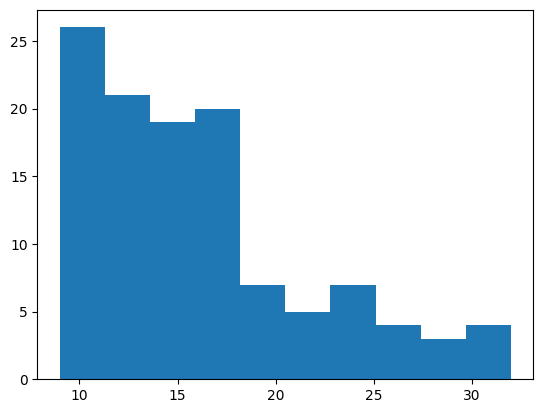

In [74]:
utiles = []
for item in sizeSeg:
    utiles.append(item[:][3])
plt.hist(utiles,bins=10)

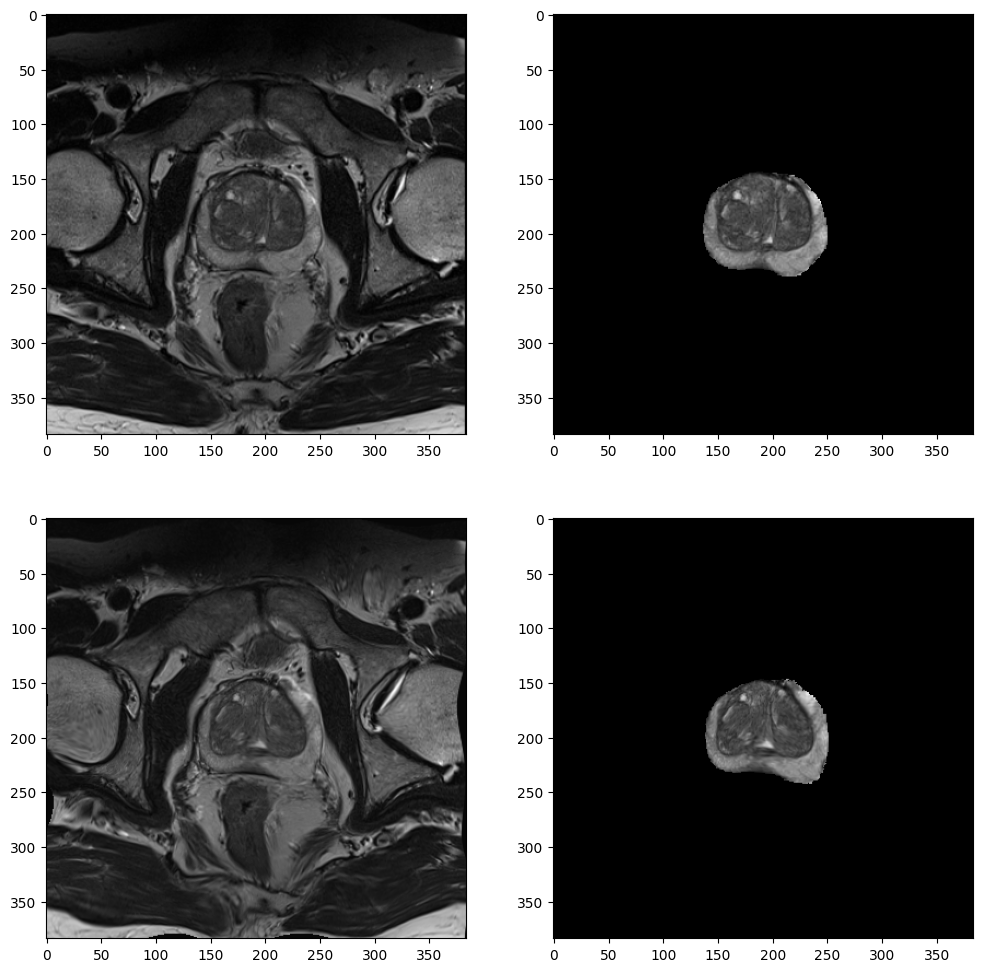

In [59]:
import elasticdeform

img = sujeto[:,:,int(np.size(sujeto,2)/2)]
segg = seg[:,:,int(np.size(sujeto,2)/2)]
img_deformed,seg_deformed = elasticdeform.deform_random_grid([img,segg], sigma=5, points=10)
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].imshow(img,cmap="gray")
ax[0,1].imshow(img*segg,cmap="gray")
ax[1,0].imshow(img_deformed,cmap="gray")
ax[1,1].imshow(img_deformed*(seg_deformed>=0.5),cmap="gray")
plt.show()


----------------------------


In [13]:
inputImage = sitk.ReadImage(fp2+"\sujeto_010.nii")
maskImage = sitk.OtsuThreshold(inputImage,0,1,200)
inputImage = sitk.Cast(inputImage,sitk.sitkFloat32)
corrector = sitk.N4BiasFieldCorrectionImageFilter()
output = corrector.Execute(inputImage,maskImage)
log_bias_field = corrector.GetLogBiasFieldAsImage(inputImage)
corrected_image_full_resolution = inputImage / sitk.Exp(log_bias_field)

In [17]:
output.affine

AttributeError: 'Image' object has no attribute 'affine'

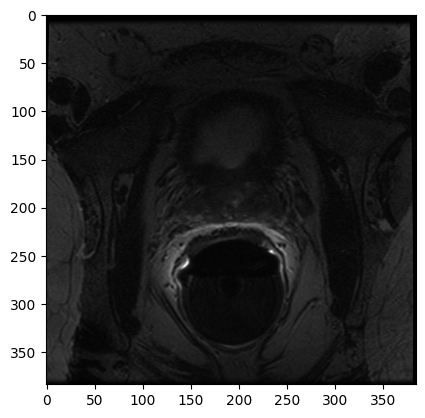

In [15]:
newimg = np.transpose(sitk.GetArrayViewFromImage(output))
plt.imshow(newimg[:,:,20],cmap="gray")

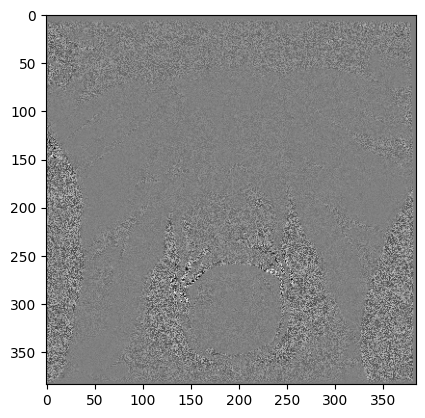

In [16]:
plt.imshow(np.transpose(sitk.GetArrayViewFromImage(corrected_image_full_resolution))[:,:,10]-img[:,:,10],cmap="gray")

In [17]:
img = np.transpose(sitk.GetArrayViewFromImage(output))
imgor = np.transpose(sitk.GetArrayViewFromImage(inputImage))

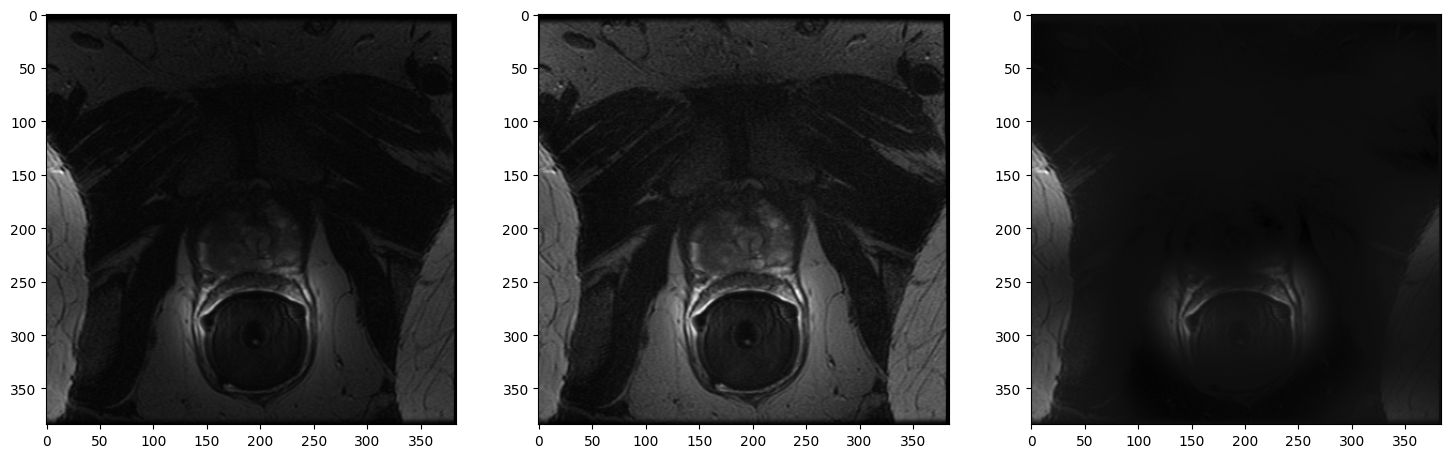

In [18]:
fig, ax = plt.subplots(1,3,figsize=(18,12))
ax[0].imshow(imgor[:,:,10],cmap="gray")
ax[1].imshow(img[:,:,10],cmap="gray")
ax[2].imshow(imgor[:,:,10]-img[:,:,10],cmap="gray")

----


In [21]:
resample = tio.Resample((x.header["pixdim"][1],x.header["pixdim"][2],1), image_interpolation='bspline')

In [56]:
x.affine

array([[ -0.52083331,   0.        ,   0.        ,  90.21839905],
       [  0.        ,  -0.52083331,   0.        ,  98.80965424],
       [  0.        ,   0.        ,   3.59999847, -57.61613464],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [22]:
transformed = resample(y)
transformed.affine

array([[-4.14460512e-01,  4.16334478e-02,  2.40320738e-02,
         9.26816719e+01],
       [-4.13667465e-02, -4.14461104e-01,  2.64994175e-02,
         7.56645279e+01],
       [ 1.10636219e-02,  9.98883344e-03,  9.99359915e-01,
        -6.28186011e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [23]:
transformed_sujeto = transformed.get_fdata()

In [24]:
sujeto.shape

(384, 384, 23)

In [25]:
transformed_sujeto.shape

(384, 384, 93)

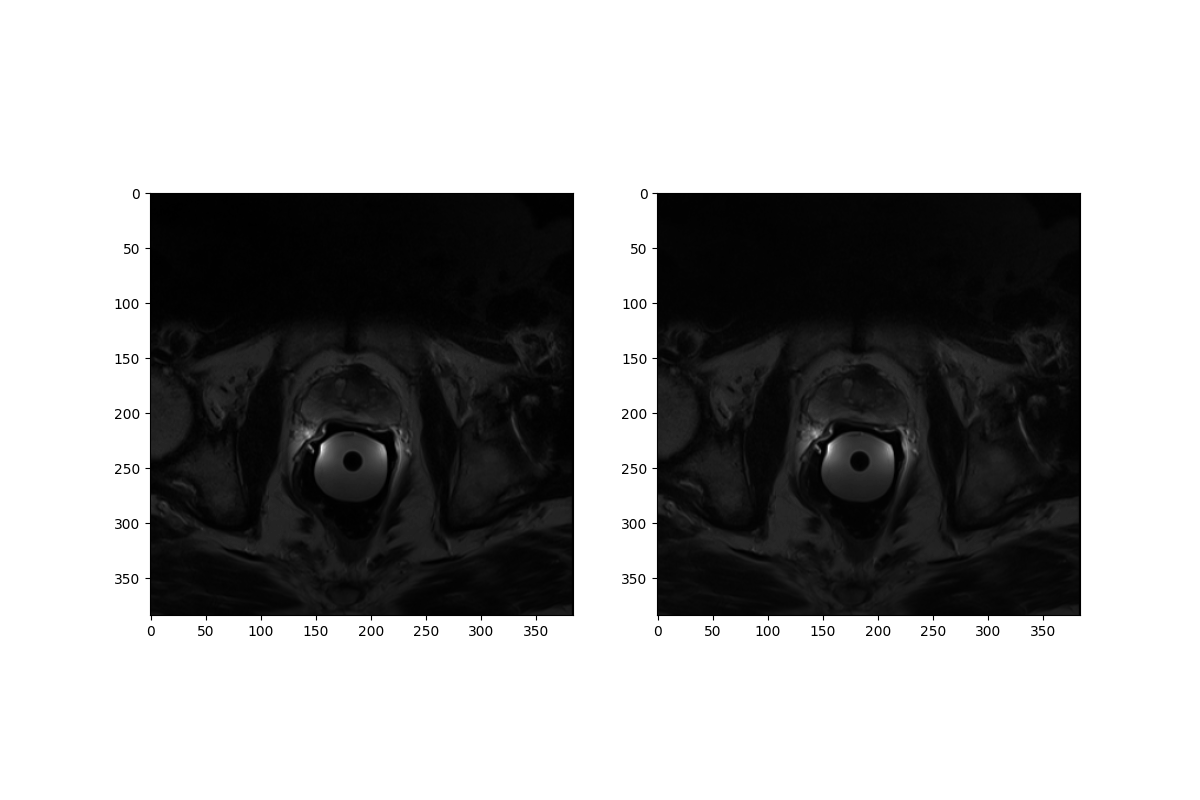

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[1].imshow(transformed_sujeto[:,:,int(np.size(transformed_sujeto,2)/2)+1],cmap="gray")



---

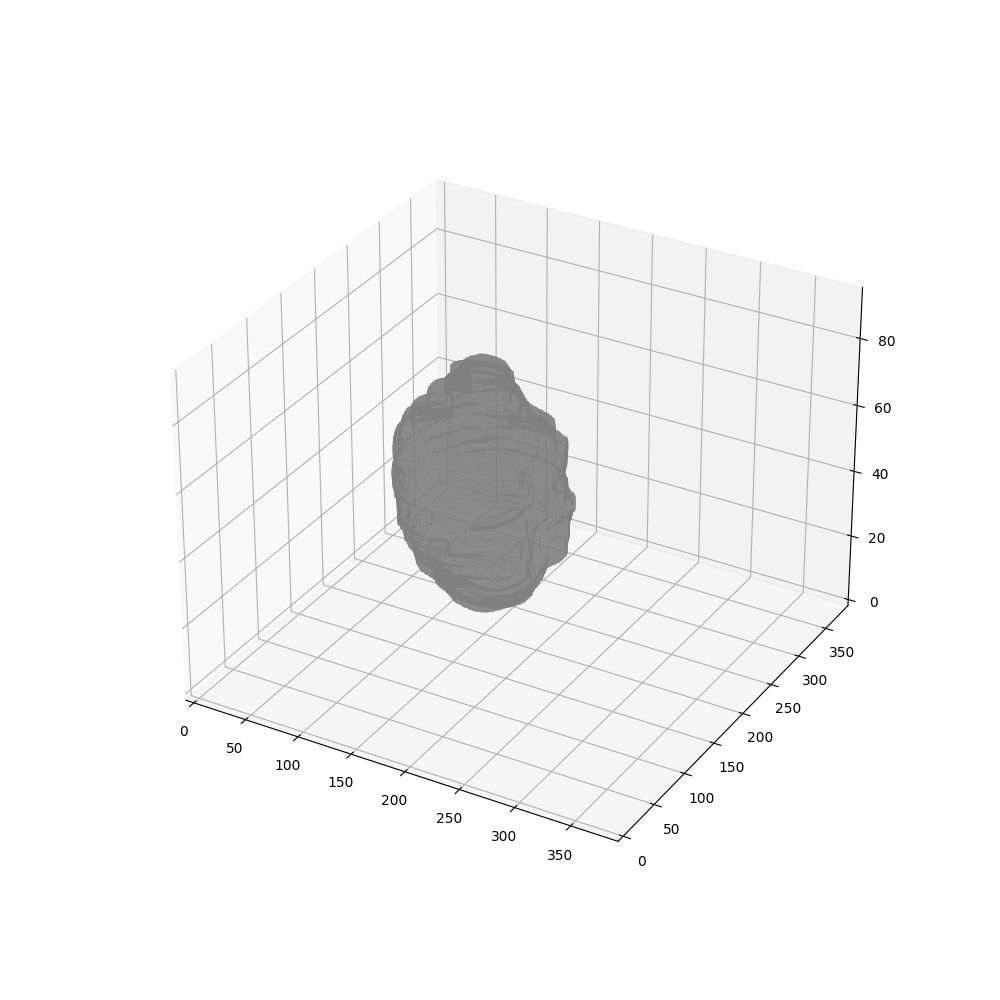

In [28]:
#%matplotlib widget # si quiero rotar el grafico
vert,faces,_,_ = marching_cubes(transformed_sujeto,step_size=1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
mesh = Poly3DCollection(vert[faces],alpha=0.9)
face_color = [0.5,0.5,0.5]
mesh.set_facecolor(face_color)
ax.add_collection(mesh)
ax.set_xlim (0,transformed_sujeto.shape[0])
ax.set_ylim (0,transformed_sujeto.shape[1])
ax.set_zlim (0,transformed_sujeto.shape[2])
plt.show()


---


In [131]:

ss = (sujeto[:,:,int(np.size(sujeto,2)/2)]/sujeto[:,:,int(np.size(sujeto,2)/2)].max())*255
ss.max()
plt.imshow(ss,cmap="gray")

NameError: name 'sujeto' is not defined

In [9]:

ss = np.asarray(ss)
cv2.imwrite("filename.png", ss)
#ss.save(r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\separadas","img_sujeto_"+str(0).zfill(4)+".jpeg")

True

In [18]:
img = (sujeto[:,:,10]/(sujeto[:,:,10]).max())*255
ss = np.asarray(img)
cv2.imwrite(fp2+"img_segmentacion_"+str(0).zfill(4)+".png", ss)

True

In [19]:
img = (sujeto[:,:,slices]/(sujeto[:,:,slices].max()))*255

In [129]:
x = nib.load(os.path.join(fp2,"sujeto_001.nii"))
img = x.get_fdata() 
for slices in range(np.size(img,2)):
    img = (img[:,:,slices]/(img[:,:,slices].max()))*255
    ss = np.asarray(img)
    cv2.imwrite("\img_segmentacion_"+str(0).zfill(4)+".png", ss)

FileNotFoundError: No such file or no access: 'C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\separadas\sujeto_001.nii'

In [10]:
rescale = tio.RescaleIntensity(out_min_max=(0, 255))
ct_normalized = rescale(x)

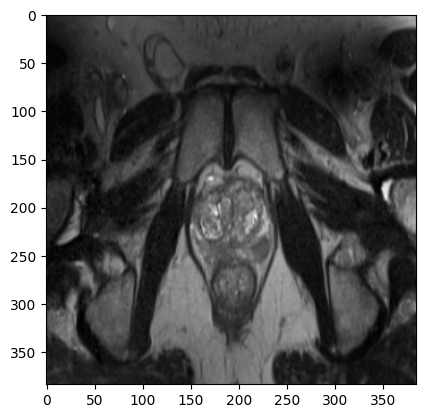

In [11]:
plt.imshow(ct_normalized.get_fdata()[:,:,int(np.size(sujeto,2)/2)],cmap="gray")

In [12]:
cv2.imwrite("img_sujeto.png", ct_normalized.get_fdata()[:,:,int(np.size(sujeto,2)/2)])

True

255 0


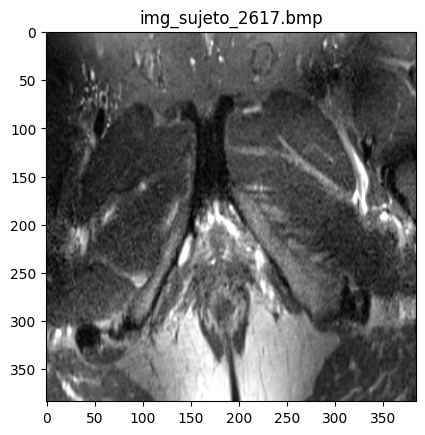

In [123]:

fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\separadas"
allfiles = os.listdir(fp2)
random_img = np.random.randint(0,len(allfiles))
im_frame = Image.open(os.path.join(fp2,allfiles[random_img]))
np_frame = np.array(im_frame.getdata())
print(np_frame.max(),np_frame.min())
plt.title(allfiles[random_img])
plt.imshow(im_frame,cmap="gray")
plt.show()

(array([[ 2.,  2.,  2.,  0.,  1.,  0.,  0.,  2.,  0.,  1.],
        [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([    0. ,  3840.7,  7681.4, 11522.1, 15362.8, 19203.5, 23044.2,
        26884.9, 30725.6, 34566.3, 38407. ]),
 <a list of 2 BarContainer objects>)

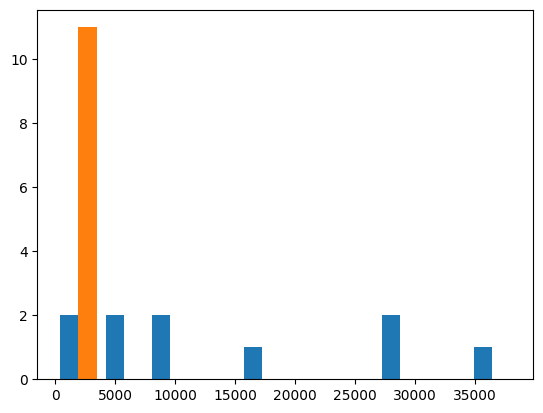

In [128]:
plt.hist(np.histogram(np_frame))